In [33]:
from pathlib import Path
import pandas as pd
from sklearn.model_selection import StratifiedGroupKFold
import os
import numpy as np
import matplotlib.pyplot as plt

In [125]:
path = Path('../data/preprocessed')
df = pd.read_csv(path/'train.csv')
df['segmentation'] = df['segmentation'].fillna('')
df['mask_path'] = df['mask_path'].str.replace('/kaggle/input/uwmgi-mask-dataset/png/', '../data/preprocessed/np').str.replace('png', 'npy')
df['image_path'] = df['image_path'].str.replace('/kaggle/input/uw-madison-gi-tract-image-segmentation', str(path.parent))
df['rle_len'] = df['segmentation'].apply(len)
df['empty'] = (df.rle_len == 0)
print(df.head())

                         id        class segmentation  case  day  slice  \
0  case123_day20_slice_0001  large_bowel                123   20      1   
1  case123_day20_slice_0001  small_bowel                123   20      1   
2  case123_day20_slice_0001      stomach                123   20      1   
3  case123_day20_slice_0002  large_bowel                123   20      2   
4  case123_day20_slice_0002  small_bowel                123   20      2   

                                          image_path  height  width  \
0  ../data/train/case123/case123_day20/scans/slic...     266    266   
1  ../data/train/case123/case123_day20/scans/slic...     266    266   
2  ../data/train/case123/case123_day20/scans/slic...     266    266   
3  ../data/train/case123/case123_day20/scans/slic...     266    266   
4  ../data/train/case123/case123_day20/scans/slic...     266    266   

                                           mask_path  rle_len  empty  
0  ../data/preprocessed/np/uw-madison-gi-tract-im..

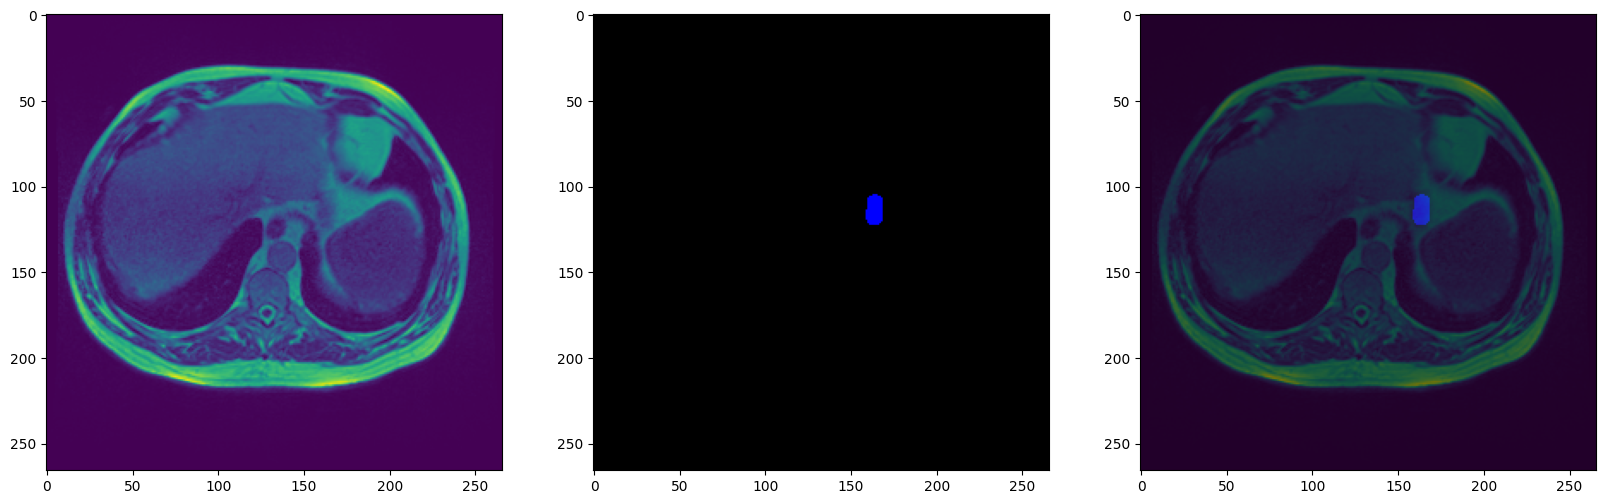

In [137]:
idx = 194
img_path = df.iloc[idx]['image_path']
mask_path = df.iloc[idx]['mask_path']
plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
img = np.array(Image.open(img_path))
plt.imshow(img)

plt.subplot(1, 3, 2)
mask = np.load(mask_path)
plt.imshow(mask)

plt.subplot(1, 3, 3)
plt.imshow(img)
plt.imshow(mask, alpha=0.5)
plt.show()

In [138]:
skf = StratifiedGroupKFold(n_splits=5)

In [139]:
for fold, (train_idx, valid_idx) in enumerate(skf.split(df, df['empty'], groups=df['case'])):
    df.loc[valid_idx, 'fold'] = fold

In [140]:
display(df.groupby(['fold','empty'])['id'].count())

fold  empty
0.0   False     6753
      True     16383
1.0   False     6764
      True     16132
2.0   False     6888
      True     16296
3.0   False     6892
      True     16436
4.0   False     6616
      True     16328
Name: id, dtype: int64

In [153]:
train_df = df.query("fold!=@fold").reset_index(drop=True)

In [154]:
train_df.head()

,id,class,segmentation,case,day,slice,image_path,height,width,mask_path,rle_len,empty,fold
0,case123_day20_slice_0001,large_bowel,,123,20,1,../data/train/case123/case123_day20/scans/slic...,266,266,../data/preprocessed/np/uw-madison-gi-tract-im...,0,True,0.0
1,case123_day20_slice_0001,small_bowel,,123,20,1,../data/train/case123/case123_day20/scans/slic...,266,266,../data/preprocessed/np/uw-madison-gi-tract-im...,0,True,0.0
2,case123_day20_slice_0001,stomach,,123,20,1,../data/train/case123/case123_day20/scans/slic...,266,266,../data/preprocessed/np/uw-madison-gi-tract-im...,0,True,0.0
3,case123_day20_slice_0002,large_bowel,,123,20,2,../data/train/case123/case123_day20/scans/slic...,266,266,../data/preprocessed/np/uw-madison-gi-tract-im...,0,True,0.0
4,case123_day20_slice_0002,small_bowel,,123,20,2,../data/train/case123/case123_day20/scans/slic...,266,266,../data/preprocessed/np/uw-madison-gi-tract-im...,0,True,0.0


In [155]:
train_df = train_df.query("empty==False").

In [156]:
train_df.head()

,id,class,segmentation,case,day,slice,image_path,height,width,mask_path,rle_len,empty,fold
194,case123_day20_slice_0065,stomach,28094 3 28358 7 28623 9 28889 9 29155 9 29421 ...,123,20,65,../data/train/case123/case123_day20/scans/slic...,266,266,../data/preprocessed/np/uw-madison-gi-tract-im...,149,False,0.0
197,case123_day20_slice_0066,stomach,27561 8 27825 11 28090 13 28355 14 28620 15 28...,123,20,66,../data/train/case123/case123_day20/scans/slic...,266,266,../data/preprocessed/np/uw-madison-gi-tract-im...,204,False,0.0
200,case123_day20_slice_0067,stomach,15323 4 15587 8 15852 10 16117 11 16383 12 166...,123,20,67,../data/train/case123/case123_day20/scans/slic...,266,266,../data/preprocessed/np/uw-madison-gi-tract-im...,688,False,0.0
203,case123_day20_slice_0068,stomach,14792 5 15056 9 15321 11 15587 11 15852 13 161...,123,20,68,../data/train/case123/case123_day20/scans/slic...,266,266,../data/preprocessed/np/uw-madison-gi-tract-im...,724,False,0.0
206,case123_day20_slice_0069,stomach,14526 6 14789 12 15054 14 15319 16 15584 17 15...,123,20,69,../data/train/case123/case123_day20/scans/slic...,266,266,../data/preprocessed/np/uw-madison-gi-tract-im...,744,False,0.0


In [149]:
train_df = train_df[train_df["empty"] == False]


In [150]:
train_df.shape

(0, 13)